# DataAugmentation

In [1]:
import matplotlib.pyplot as plt

import pandas as pd

import random
import os

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Directorio donde se almacenarán las imágenes divididas
PATH = "../../"
split_path = PATH + "SplitDataset/"
directory = split_path + "train/"

# Rutas de los archivos CSV que contienen las etiquetas y rutas de las imágenes
CSV = PATH + "CSVs/dataset/train.csv"

PATH_IMAGENES = PATH + "Dataset/"

In [3]:
TARGET_IMG_WIDTH = 224
TARGET_IMG_HEIGHT = 224
TARGET_IMG_CHANNELS = 3
TARGET_SIZE = [TARGET_IMG_WIDTH, TARGET_IMG_HEIGHT]
TARGET_SHAPE = [TARGET_IMG_WIDTH, TARGET_IMG_HEIGHT, TARGET_IMG_CHANNELS]

BATCH_SIZE = 32

In [4]:
print('\nLoading Data...')
dataset_data = tf.keras.utils.image_dataset_from_directory(
    directory,
    shuffle = True,
    # seed=SEED,
    #image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    #label_mode="categorical"
)


Loading Data...
Found 6391 files belonging to 8 classes.


In [5]:
# Cargar el archivo CSV en un DataFrame de pandas
df_dataset = pd.read_csv(CSV)

In [6]:
image_dict = {} # dict to store image array (key) for every class (value)
images = []
count_dict = {} # dict to store count of files (key) for every class (value)

# Obtener las clases únicas del DataFrame
classes = df_dataset['class'].unique()

# Iterar sobre las clases únicas
for cls in classes:
    # Filtrar el DataFrame por clase
    class_df = df_dataset[df_dataset['class'] == cls]

    # Obtener una imagen aleatoria de la clase
    random_index = random.choice(class_df.index)
    image_path = os.path.join(PATH_IMAGENES, class_df.loc[random_index, 'path'])

    # Cargar la imagen usando la función de utilidad de keras y guardarla en image_dict
    img = tf.keras.utils.load_img(image_path)
    image_dict[cls] = img
    images.append(img)

    # Contar el número de imágenes en la clase y guardar el recuento en count_dict
    count_dict[cls] = len(class_df)

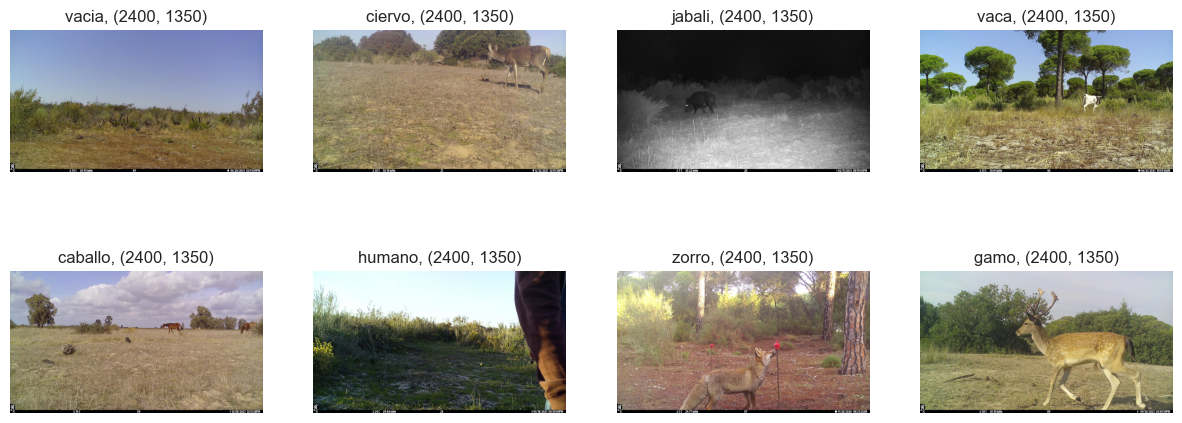

In [7]:
## Visualize
plt.figure(figsize=(15, 12))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()):
    # create a subplot axis
    ax = plt.subplot(4, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

In [8]:
# Obtener un lote de imágenes originales del conjunto de datos
batch_images, _ = next(iter(dataset_data))

### Aumento de datos

In [9]:
# Data Processing Stage with resizing and rescaling operations
data_augmentation = keras.Sequential(
    name="data_preprocess_data_augmentation",
    layers=[
        layers.Rescaling(1.0/255), # Value Preprocessing
        layers.Resizing(TARGET_IMG_HEIGHT, TARGET_IMG_WIDTH), # Shape Preprocessing

        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),

        tf.keras.layers.RandomContrast(factor = 0.5), # (x - mean) * contrast_factor + mean
        tf.keras.layers.RandomBrightness(factor = 0.3, value_range=(0,1)),
        tf.keras.layers.GaussianNoise(0.1),

        # tf.keras.layers.CenterCrop(50,50)
        # tf.keras.layers.RandomCrop(50,50)
        # tf.keras.layers.RandomZoom(50,50)


        tf.keras.layers.RandomTranslation(
            height_factor = 1,
            width_factor= 1,
            fill_mode='wrap',
            interpolation='bilinear',
            seed=None,
            fill_value=0.0,
        )
    ]
)

# Perform Data Processing on the train, val, test dataset
# dataset = dataset_data.map(lambda x, y: (data_augmentation(x), y))

In [10]:
# Aplicar el data_augmentation a cada imagen de muestra
augmented_images = data_augmentation(batch_images, training=True)

### Visualización de las imágenes seleccionadas

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

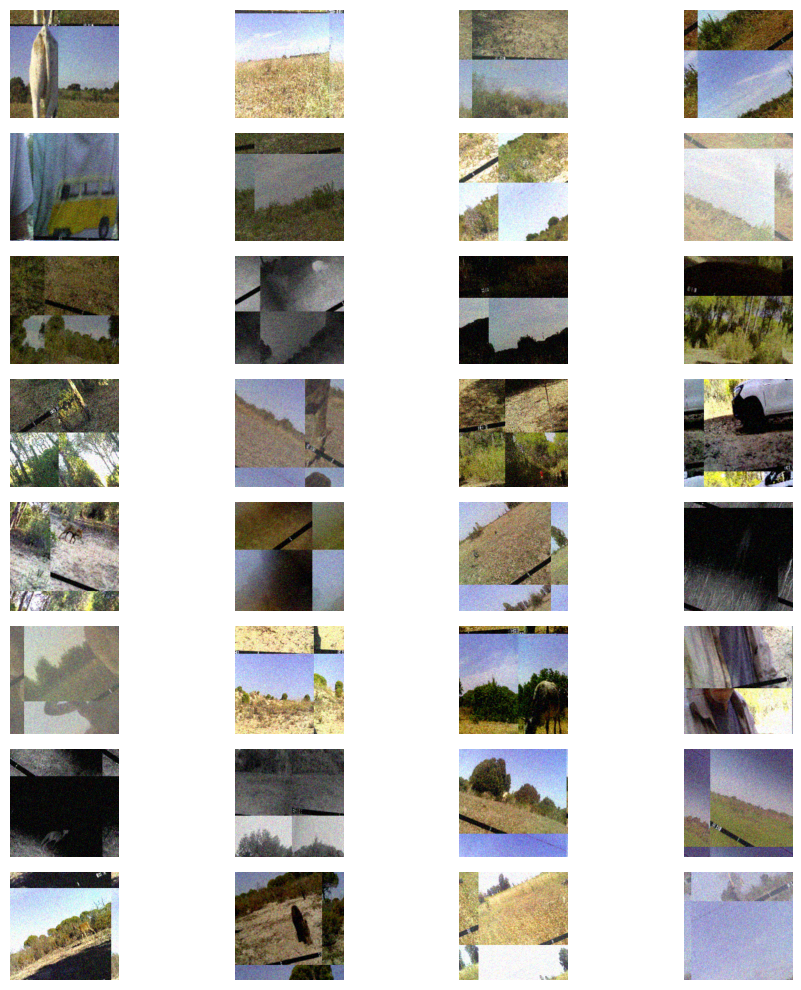

In [11]:
# Visualizar las imágenes de muestra después del data_augmentation
fig, axes = plt.subplots(8, 4, figsize=(10, 10))
axes = axes.flatten()

for i in range(32):
    image = augmented_images[i].numpy()  # Convertir el tensor a un arreglo NumPy
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()